## Biodiversity


### Load the data


In [1]:
import pandas as pd

In [3]:
obs = pd.read_csv('observations.csv')
sp = pd.read_csv('species_info.csv')

In [4]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
obs.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

In [7]:
sp.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
sp.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [11]:
sp.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [25]:
sp.conservation_status.isna().count()

5824

In [24]:
print(sp.category.nunique())
sp.category.value_counts()

7


category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

### exploratory data analysis

#### distribution of conservation status

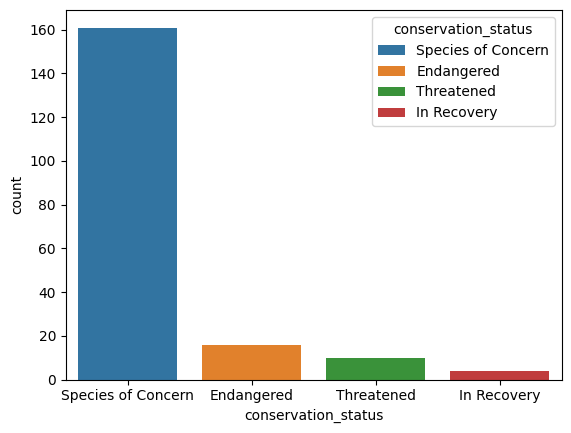

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = sp, x ='conservation_status', hue ='conservation_status')
plt.show()
plt.clf()

#### conservation status for different categories of animals

In [18]:
endangeredsp = sp[sp.conservation_status == 'Endangered']

In [21]:
endangeredsp.head()

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered


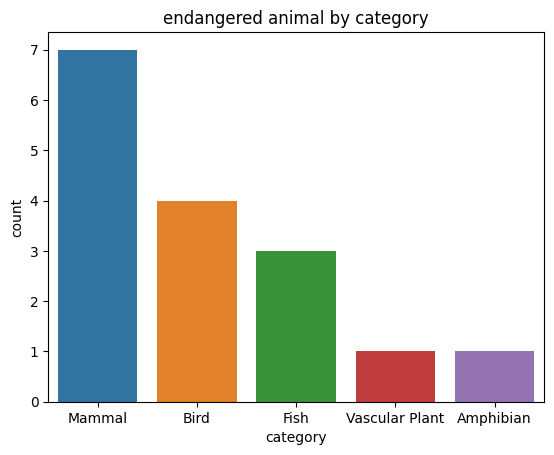

<Figure size 640x480 with 0 Axes>

In [30]:
sns.countplot(data = endangeredsp, x = 'category', hue ='category')
plt.title('endangered animal by category')
plt.show()
plt.clf()

In [31]:
sp.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

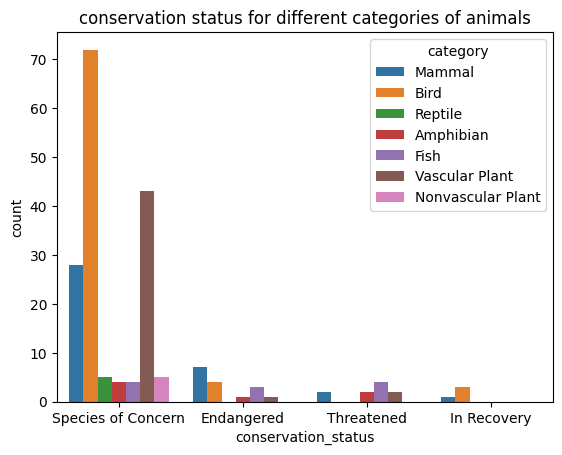

<Figure size 640x480 with 0 Axes>

In [33]:
sns.countplot(data = sp, x = 'conservation_status', hue ='category')
plt.title('conservation status for different categories of animals')
plt.show()
plt.clf()

### Analysis


#### Which categories of animal is more likely to be endangered?


In [72]:
import numpy as np
sp.conservation_status.fillna('no intervention', inplace = True) 
sp['protected'] = sp.conservation_status. apply(lambda x: 'False' if x == 'no intervention'
                                                else 'True')

In [73]:
sp.head()

,category,scientific_name,common_names,conservation_status,protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,no intervention,False
1,Mammal,Bos bison,"American Bison, Bison",no intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",no intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",no intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,no intervention,False


In [74]:
sp.protected.value_counts()

protected
False    5633
True      191
Name: count, dtype: int64

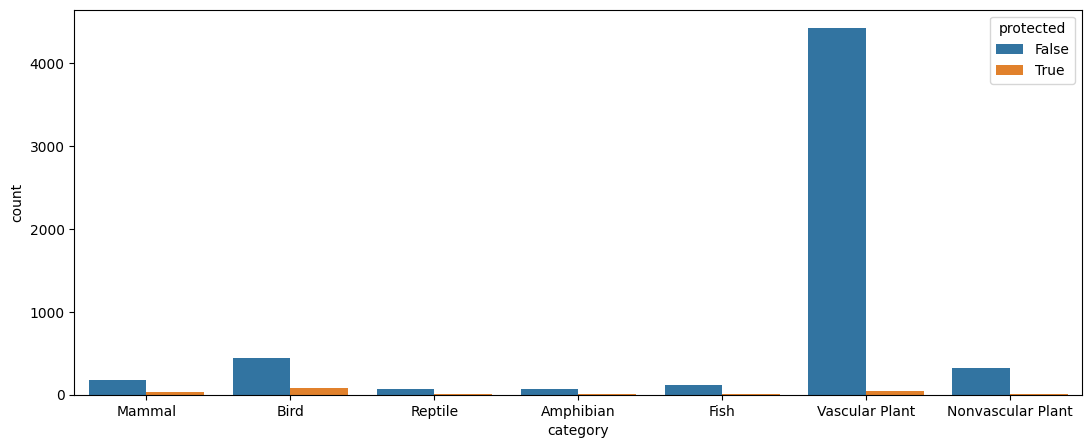

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize =(13,5))
sns.countplot(data =sp, x = 'category', hue ='protected')
plt.show()
plt.clf()

In [109]:
category_counts = sp.groupby(['category','protected']).scientific_name.nunique().reset_index().pivot(
    columns ='protected',values = 'scientific_name', index ='category' ).reset_index()
category_counts.columns =['category','not_protected','protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [112]:
category_counts['protected_per'] = category_counts.protected /(category_counts.protected + 
                                                              category_counts.not_protected)*100

In [113]:
category_counts

,category,not_protected,protected,protected_per
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### chi-squared test


##### mammal vs bird

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

In [114]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

p value = 0.69 >> 0.05, 
accept null hypothesis,
mammal and birds don't have statistically significant difference in their conservation status.

##### mammal vs reptile


||protected|not protected|
|-|-|-|
|Mammal|?|?|
|reptile|?|?|

In [115]:
contingency2 =[[30,146],
               [5,73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

p value < 0.05, null hypothesis is rejected. There is significant difference between the conservation status of reptile and mammals. 

#### species in park

In [116]:
obs.scientific_name.nunique()

5541

In [118]:
obs.groupby('park_name').scientific_name.nunique()

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64